In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
df1 = pd.read_excel('Model MRI-ESM2-0.xlsx')
df1

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,76.49696,0.017237,0.000000,0.0,100735.3,408.2327,217.1331,2.060274,298.0307,305.6005,295.6811
1,1980-01-02,75.42651,0.016577,0.000000,0.0,100804.1,406.4674,204.9701,2.122913,297.8145,305.0250,294.9907
2,1980-01-03,68.94768,0.013349,0.000000,0.0,101004.4,385.6631,212.4397,3.171431,296.8232,304.5876,291.3675
3,1980-01-04,66.20910,0.011376,0.000000,0.0,101037.4,360.4382,232.3447,2.825781,295.8231,301.4745,291.7450
4,1980-01-05,67.44240,0.012239,0.000000,0.0,100909.3,373.6089,243.4497,2.179346,296.4566,302.4467,291.1232
...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,71.06457,0.014167,0.000000,0.0,101079.8,387.8261,207.3206,2.480450,297.1151,303.2416,293.8998
12780,2014-12-28,70.02234,0.013469,0.000000,0.0,101085.3,395.9844,191.2161,3.417132,296.7991,302.0900,294.2166
12781,2014-12-29,75.09789,0.015633,0.000000,0.0,100907.9,401.0377,198.5231,2.247940,297.4819,303.1815,293.9255
12782,2014-12-30,83.18219,0.018896,0.000020,0.0,100844.9,416.2245,211.4976,1.460020,297.8682,305.3698,295.5657


In [ ]:
dfcopy = df1.copy()

In [ ]:
# Chọn dữ liệu từ ngày 1-1-1980 trở đi
import datetime
start_date = datetime.datetime(1980, 1, 1)
dfcopy['Date'] = pd.to_datetime(dfcopy['Date'])
GCM_data = dfcopy[dfcopy['Date'] >= start_date]

In [ ]:
GCM_data

,Date,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,76.49696,0.017237,0.000000,0.0,100735.3,408.2327,217.1331,2.060274,298.0307,305.6005,295.6811
1,1980-01-02,75.42651,0.016577,0.000000,0.0,100804.1,406.4674,204.9701,2.122913,297.8145,305.0250,294.9907
2,1980-01-03,68.94768,0.013349,0.000000,0.0,101004.4,385.6631,212.4397,3.171431,296.8232,304.5876,291.3675
3,1980-01-04,66.20910,0.011376,0.000000,0.0,101037.4,360.4382,232.3447,2.825781,295.8231,301.4745,291.7450
4,1980-01-05,67.44240,0.012239,0.000000,0.0,100909.3,373.6089,243.4497,2.179346,296.4566,302.4467,291.1232
...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,71.06457,0.014167,0.000000,0.0,101079.8,387.8261,207.3206,2.480450,297.1151,303.2416,293.8998
12780,2014-12-28,70.02234,0.013469,0.000000,0.0,101085.3,395.9844,191.2161,3.417132,296.7991,302.0900,294.2166
12781,2014-12-29,75.09789,0.015633,0.000000,0.0,100907.9,401.0377,198.5231,2.247940,297.4819,303.1815,293.9255
12782,2014-12-30,83.18219,0.018896,0.000020,0.0,100844.9,416.2245,211.4976,1.460020,297.8682,305.3698,295.5657


In [ ]:
actual_data = pd.read_excel('Precipitation_actual.xlsx')
actual_data

,Date,actual Precipitation
0,1980-01-01,0.0
1,1980-01-02,0.0
2,1980-01-03,0.0
3,1980-01-04,0.0
4,1980-01-05,0.0
...,...,...
12779,2014-12-27,0.0
12780,2014-12-28,0.0
12781,2014-12-29,0.0
12782,2014-12-30,0.0


# Merged data

In [ ]:
# Merge GCM data into the new DataFrame based on date
merged_data = pd.merge(actual_data, GCM_data, on='Date', how='left')
merged_data

,Date,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,0.0,76.49696,0.017237,0.000000,0.0,100735.3,408.2327,217.1331,2.060274,298.0307,305.6005,295.6811
1,1980-01-02,0.0,75.42651,0.016577,0.000000,0.0,100804.1,406.4674,204.9701,2.122913,297.8145,305.0250,294.9907
2,1980-01-03,0.0,68.94768,0.013349,0.000000,0.0,101004.4,385.6631,212.4397,3.171431,296.8232,304.5876,291.3675
3,1980-01-04,0.0,66.20910,0.011376,0.000000,0.0,101037.4,360.4382,232.3447,2.825781,295.8231,301.4745,291.7450
4,1980-01-05,0.0,67.44240,0.012239,0.000000,0.0,100909.3,373.6089,243.4497,2.179346,296.4566,302.4467,291.1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,0.0,71.06457,0.014167,0.000000,0.0,101079.8,387.8261,207.3206,2.480450,297.1151,303.2416,293.8998
12780,2014-12-28,0.0,70.02234,0.013469,0.000000,0.0,101085.3,395.9844,191.2161,3.417132,296.7991,302.0900,294.2166
12781,2014-12-29,0.0,75.09789,0.015633,0.000000,0.0,100907.9,401.0377,198.5231,2.247940,297.4819,303.1815,293.9255
12782,2014-12-30,0.0,83.18219,0.018896,0.000020,0.0,100844.9,416.2245,211.4976,1.460020,297.8682,305.3698,295.5657


In [ ]:
null_counts = merged_data.isna().sum()
null_counts

Date                    0
actual Precipitation    0
hurs                    0
huss                    0
pr                      0
prsn                    0
ps                      0
rlds                    0
rsds                    0
sfcwind                 0
tas                     0
tasmax                  0
tasmin                  0
dtype: int64

# Convert unit of GCM precipitation

In [ ]:
# Change the unit of GCM precipitation form kg m-2 s-1 to mm/day
merged_data['pr'] = merged_data['pr'] * 86400
merged_data

,Date,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
0,1980-01-01,0.0,76.49696,0.017237,0.000000,0.0,100735.3,408.2327,217.1331,2.060274,298.0307,305.6005,295.6811
1,1980-01-02,0.0,75.42651,0.016577,0.000000,0.0,100804.1,406.4674,204.9701,2.122913,297.8145,305.0250,294.9907
2,1980-01-03,0.0,68.94768,0.013349,0.000000,0.0,101004.4,385.6631,212.4397,3.171431,296.8232,304.5876,291.3675
3,1980-01-04,0.0,66.20910,0.011376,0.000000,0.0,101037.4,360.4382,232.3447,2.825781,295.8231,301.4745,291.7450
4,1980-01-05,0.0,67.44240,0.012239,0.000000,0.0,100909.3,373.6089,243.4497,2.179346,296.4566,302.4467,291.1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,2014-12-27,0.0,71.06457,0.014167,0.000000,0.0,101079.8,387.8261,207.3206,2.480450,297.1151,303.2416,293.8998
12780,2014-12-28,0.0,70.02234,0.013469,0.000000,0.0,101085.3,395.9844,191.2161,3.417132,296.7991,302.0900,294.2166
12781,2014-12-29,0.0,75.09789,0.015633,0.000000,0.0,100907.9,401.0377,198.5231,2.247940,297.4819,303.1815,293.9255
12782,2014-12-30,0.0,83.18219,0.018896,1.686944,0.0,100844.9,416.2245,211.4976,1.460020,297.8682,305.3698,295.5657


# Calculate mean of each column monthly

In [ ]:
merged_data = merged_data.set_index('Date')
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

merged_data = create_features(merged_data)

In [ ]:
merged_data

,actual Precipitation,hurs,huss,pr,prsn,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
1980-01-01,0.0,76.49696,0.017237,0.000000,0.0,100735.3,408.2327,217.1331,2.060274,298.0307,305.6005,295.6811,1,1,1980,1,1,1
1980-01-02,0.0,75.42651,0.016577,0.000000,0.0,100804.1,406.4674,204.9701,2.122913,297.8145,305.0250,294.9907,1,1,1980,2,2,1
1980-01-03,0.0,68.94768,0.013349,0.000000,0.0,101004.4,385.6631,212.4397,3.171431,296.8232,304.5876,291.3675,1,1,1980,3,3,1
1980-01-04,0.0,66.20910,0.011376,0.000000,0.0,101037.4,360.4382,232.3447,2.825781,295.8231,301.4745,291.7450,1,1,1980,4,4,1
1980-01-05,0.0,67.44240,0.012239,0.000000,0.0,100909.3,373.6089,243.4497,2.179346,296.4566,302.4467,291.1232,1,1,1980,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.0,71.06457,0.014167,0.000000,0.0,101079.8,387.8261,207.3206,2.480450,297.1151,303.2416,293.8998,4,12,2014,361,27,52
2014-12-28,0.0,70.02234,0.013469,0.000000,0.0,101085.3,395.9844,191.2161,3.417132,296.7991,302.0900,294.2166,4,12,2014,362,28,52
2014-12-29,0.0,75.09789,0.015633,0.000000,0.0,100907.9,401.0377,198.5231,2.247940,297.4819,303.1815,293.9255,4,12,2014,363,29,1


In [ ]:
# Sum precipitation by month and year
sumAcPrMonth = merged_data.groupby(['month', 'year'])['actual Precipitation'].mean().reset_index()
# Average hurs by month and year
avgGCMHursMonth = merged_data.groupby(['month', 'year'])['hurs'].mean().reset_index()
# Average huss by month and year
avgGCMHussMonth = merged_data.groupby(['month', 'year'])['huss'].mean().reset_index()
# Sum GCM precipitation by month and year
sumGCMPrMonth = merged_data.groupby(['month', 'year'])['pr'].mean().reset_index()
# Average ps by month and year
avgGCMPsMonth = merged_data.groupby(['month', 'year'])['ps'].mean().reset_index()
# Average rlds by month and year
avgGCMRldsMonth = merged_data.groupby(['month', 'year'])['rlds'].mean().reset_index()
# Average rsds by month and year
avgGCMRsdsMonth = merged_data.groupby(['month', 'year'])['rsds'].mean().reset_index()
# Average sfcwind by month and year
avgGCMSfcwindMonth = merged_data.groupby(['month', 'year'])['sfcwind'].mean().reset_index()
# Average tas by month and year
avgGCMtasMonth = merged_data.groupby(['month', 'year'])['tas'].mean().reset_index()
# Average tasmax by month and year
avgGCMtasmaxMonth = merged_data.groupby(['month', 'year'])['tasmax'].mean().reset_index()
# Average tasmin by month and year
avgGCMtasminMonth = merged_data.groupby(['month', 'year'])['tasmin'].mean().reset_index()

In [ ]:
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumAcPrMonth.index = sumAcPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHursMonth.index = avgGCMHursMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMHussMonth.index = avgGCMHussMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
sumGCMPrMonth.index = sumGCMPrMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRldsMonth.index = avgGCMRldsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMPsMonth.index = avgGCMPsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMRsdsMonth.index = avgGCMRsdsMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMSfcwindMonth.index = avgGCMSfcwindMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasMonth.index = avgGCMtasMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasmaxMonth.index = avgGCMtasmaxMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)
# Tạo cột mới 'index' dựa trên 'month' và 'year' với định dạng 'year-month'
avgGCMtasminMonth.index = avgGCMtasminMonth.apply(lambda row: f"{int(row['year'])}-{int(row['month']):02d}-1", axis=1)

In [ ]:
sumAcPrMonth.index = pd.to_datetime(sumAcPrMonth.index, format='%Y-%m-%d')
avgGCMHursMonth.index = pd.to_datetime(avgGCMHursMonth.index, format='%Y-%m-%d')
avgGCMHussMonth.index = pd.to_datetime(avgGCMHussMonth.index, format='%Y-%m-%d')
sumGCMPrMonth.index = pd.to_datetime(sumGCMPrMonth.index, format='%Y-%m-%d')
avgGCMRldsMonth.index = pd.to_datetime(avgGCMRldsMonth.index, format='%Y-%m-%d')
avgGCMPsMonth.index = pd.to_datetime(avgGCMPsMonth.index, format='%Y-%m-%d')
avgGCMRsdsMonth.index = pd.to_datetime(avgGCMRsdsMonth.index, format='%Y-%m-%d')
avgGCMSfcwindMonth.index = pd.to_datetime(avgGCMSfcwindMonth.index, format='%Y-%m-%d')
avgGCMtasMonth.index = pd.to_datetime(avgGCMtasMonth.index, format='%Y-%m-%d')
avgGCMtasmaxMonth.index = pd.to_datetime(avgGCMtasmaxMonth.index, format='%Y-%m-%d')
avgGCMtasminMonth.index = pd.to_datetime(avgGCMtasminMonth.index, format='%Y-%m-%d')

In [ ]:
# Tạo chuỗi thời gian từ tháng 1/1980 đến tháng 12/2014
dates = pd.date_range(start="1980-01-01", end="2014-12-01", freq='MS')

# New dataFrame with average value of each columns monthly

In [ ]:
df = pd.DataFrame(index=dates)
df['actual Precipitation'] = sumAcPrMonth.drop(['month','year'], axis = 1)
df['hurs'] = avgGCMHursMonth.drop(['month','year'], axis = 1)
df['huss'] = avgGCMHussMonth.drop(['month','year'], axis = 1)
df['pr'] = sumGCMPrMonth.drop(['month','year'], axis = 1)
df['ps'] = avgGCMPsMonth.drop(['month','year'], axis = 1)
df['rlds'] =avgGCMRldsMonth.drop(['month','year'], axis = 1)
df['rsds'] =avgGCMRsdsMonth.drop(['month','year'], axis = 1)
df['sfcwind'] =avgGCMSfcwindMonth.drop(['month','year'], axis = 1)
df['tas'] =avgGCMtasMonth.drop(['month','year'], axis = 1)
df['tasmax'] =avgGCMtasmaxMonth.drop(['month','year'], axis = 1)
df['tasmin'] =avgGCMtasminMonth.drop(['month','year'], axis = 1)

In [ ]:
df

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
1980-01-01,1.151613,72.218335,0.014545,0.071022,100825.867742,389.940916,216.518365,2.473208,296.614900,303.831555,293.602758
1980-02-01,0.065517,75.680311,0.016643,0.893410,100692.427586,404.820334,231.417593,2.885489,297.511897,305.100679,295.800317
1980-03-01,0.006452,73.596425,0.016497,2.365617,100802.264516,406.213619,246.245697,2.452594,298.380210,305.529574,296.321910
1980-04-01,0.086667,77.003761,0.018665,1.174607,100652.730000,417.426887,248.327947,2.165734,299.497290,306.631493,297.445967
1980-05-01,9.293548,82.327030,0.019906,6.174146,100600.238710,426.141168,225.561690,1.842990,299.898435,306.404687,298.101800
...,...,...,...,...,...,...,...,...,...,...,...
2014-08-01,11.400000,85.272119,0.020356,5.395634,100636.929032,429.419835,203.938126,2.225647,300.746965,305.781616,298.472229
2014-09-01,11.403333,87.263569,0.020285,10.444915,100543.250000,430.392457,190.478647,2.139218,300.559960,305.268313,298.165997
2014-10-01,9.887097,85.905092,0.019436,9.287023,100697.825806,426.148984,165.116916,1.571630,300.116471,304.697248,297.481048
2014-11-01,6.073333,82.242826,0.018891,7.322717,100714.086667,423.388800,173.767353,1.711507,299.611483,304.515983,297.390967


In [ ]:
df.describe()

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,5.236412,79.985022,0.018695,4.736630,100717.553668,418.326683,211.253045,2.201058,299.548476,305.728887,297.399016
std,4.576216,6.561995,0.001841,4.475054,162.956563,13.171197,29.259100,0.509057,1.232266,1.376650,1.305372
min,0.000000,64.202986,0.012521,0.000000,100383.216129,375.758897,146.297227,1.211351,295.582774,302.029281,292.308481
25%,0.543038,73.919917,0.017071,0.599915,100580.844839,407.325148,189.684694,1.808565,298.538190,304.718195,296.405729
50%,4.917849,82.100574,0.019357,3.454513,100697.183871,423.710478,205.921130,2.162610,299.840576,305.475570,297.751932
75%,8.621774,85.661119,0.020206,8.089202,100837.383986,428.747460,235.677626,2.560338,300.486624,306.421784,298.402328
max,17.930000,89.346052,0.021266,18.251537,101127.638710,437.475319,277.624750,3.831156,302.110858,309.685555,299.879500


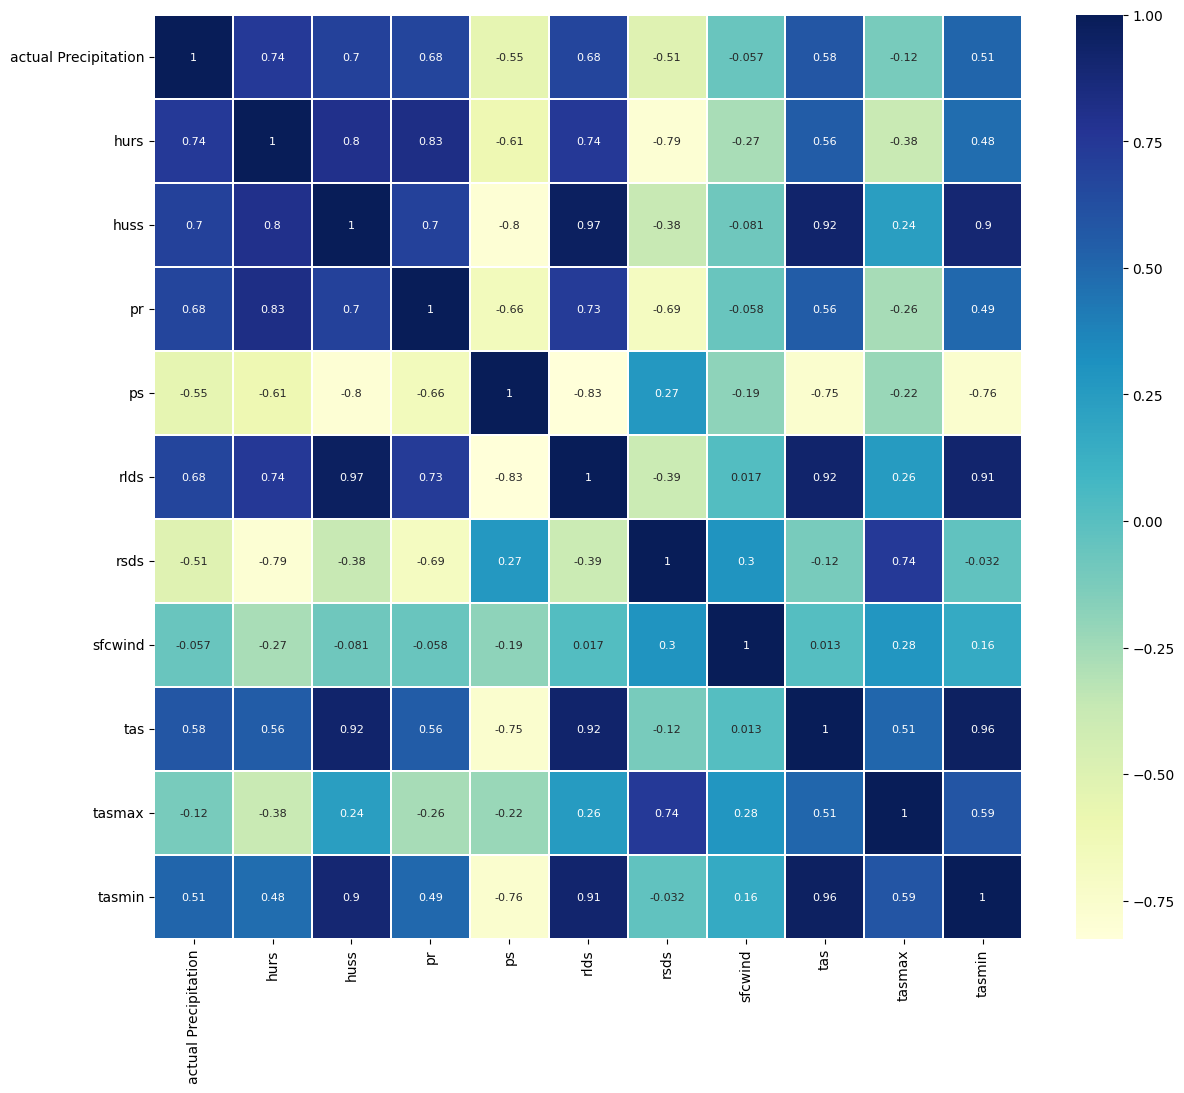

In [ ]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)
plt.show()

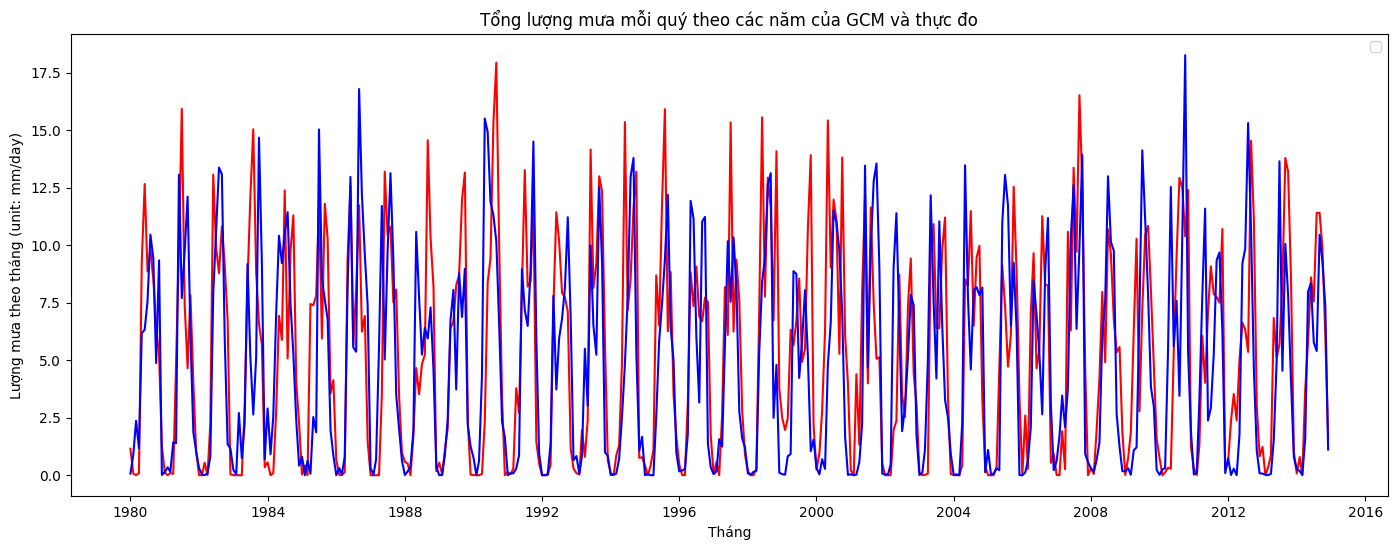

In [ ]:
# bar chart
plt.figure(figsize=(17, 6))
plt.plot(df.index, df['actual Precipitation'], color='red')
plt.plot(df.index, df['pr'], color='blue')
# Đặt nhãn cho trục x và y
plt.xlabel('Tháng')
plt.ylabel('Lượng mưa theo tháng (unit: mm/day)')
# Đặt tiêu đề cho biểu đồ
plt.title('Tổng lượng mưa mỗi quý theo các năm của GCM và thực đo')
# Hiển thị biểu đồ
plt.legend()
plt.show()

# Train test split

In [ ]:
start_date = datetime.datetime(2010, 1, 1)
df.index = pd.to_datetime(df.index)
train_set = df[df.index < start_date]
test_set = df[df.index >= start_date]

In [ ]:
train_set

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
1980-01-01,1.151613,72.218335,0.014545,0.071022,100825.867742,389.940916,216.518365,2.473208,296.614900,303.831555,293.602758
1980-02-01,0.065517,75.680311,0.016643,0.893410,100692.427586,404.820334,231.417593,2.885489,297.511897,305.100679,295.800317
1980-03-01,0.006452,73.596425,0.016497,2.365617,100802.264516,406.213619,246.245697,2.452594,298.380210,305.529574,296.321910
1980-04-01,0.086667,77.003761,0.018665,1.174607,100652.730000,417.426887,248.327947,2.165734,299.497290,306.631493,297.445967
1980-05-01,9.293548,82.327030,0.019906,6.174146,100600.238710,426.141168,225.561690,1.842990,299.898435,306.404687,298.101800
...,...,...,...,...,...,...,...,...,...,...,...
2009-08-01,10.448387,87.666136,0.020436,11.078978,100571.203226,431.951900,177.136424,2.472099,300.396577,304.711548,298.469484
2009-09-01,10.836667,86.994759,0.020063,7.850455,100655.150000,432.311557,178.423227,2.485685,300.319047,304.950990,298.135330
2009-10-01,8.032258,83.372452,0.019417,3.839399,100818.206452,422.024194,198.424616,1.832350,299.922139,305.461981,297.396984
2009-11-01,4.706667,80.803901,0.018674,2.978621,100726.210000,419.180947,181.810606,1.874059,299.501083,304.800450,297.292630


In [ ]:
test_set

,actual Precipitation,hurs,huss,pr,ps,rlds,rsds,sfcwind,tas,tasmax,tasmin
2010-01-01,0.741935,71.948825,0.015547,0.018162,100861.116129,398.255384,205.400384,1.892232,297.460494,304.752816,294.857874
2010-02-01,0.000000,68.965519,0.016194,0.253325,100736.842857,404.054096,238.172121,2.419043,298.464743,306.527600,296.441739
2010-03-01,0.125806,64.202986,0.015987,0.305619,100811.116129,409.818097,251.941242,2.662518,299.225048,307.607900,297.638458
2010-04-01,0.330000,77.777093,0.019632,5.373916,100652.836667,429.044427,236.624753,2.132084,300.770207,307.497000,298.533213
2010-05-01,0.283871,82.910371,0.020829,12.527151,100515.522581,434.812071,204.696829,2.133764,301.051497,306.966977,299.085281
2010-06-01,5.333333,83.758079,0.020632,5.600304,100553.626667,428.733563,213.770700,2.312682,300.851380,306.655220,298.540970
2010-07-01,9.493548,85.796862,0.020565,7.582221,100588.341935,427.764745,208.038387,2.229439,300.775468,305.895729,298.500752
2010-08-01,12.922581,83.594142,0.020729,3.449380,100706.003226,426.399732,233.375013,1.559864,300.826361,307.010948,298.933219
2010-09-01,12.456667,87.108097,0.020317,10.612985,100571.520000,430.400563,184.269623,1.810707,300.740337,305.191290,298.177997
2010-10-01,10.380645,88.875078,0.019973,18.251537,100595.093548,431.149352,149.683592,1.305017,300.627503,304.491668,297.805726


In [ ]:
X_train = train_set.drop('actual Precipitation', axis = 1)
X_test = test_set.drop('actual Precipitation', axis = 1)
y_train = train_set['actual Precipitation']
y_test = test_set['actual Precipitation']

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

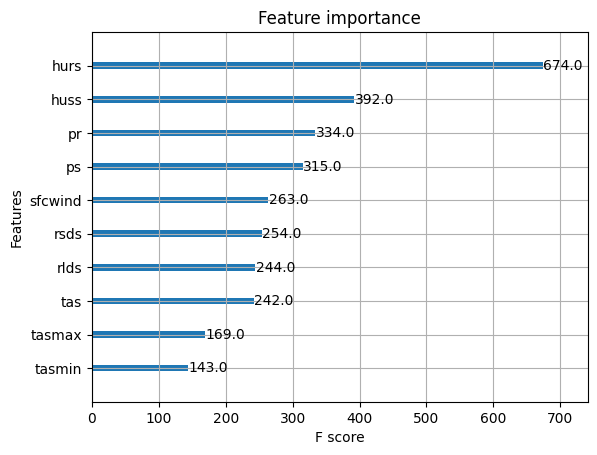

In [ ]:
xgb_model.get_params()
xgb.plot_importance(xgb_model)

In [ ]:
def NSE(y_test, y_pred):
  return 1-(np.sum((y_test-y_pred)**2)/np.sum((y_test-np.mean(y_test))**2))

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
print('Mean absolute Error:', mae)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('Root mean squared Error:', rmse)
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)
print("NSE:", nse)

Mean absolute Error: 0.007128374393126656
Root mean squared Error: 0.01039177532637545
NSE: 0.9999948915786713


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute Error:', mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean squared Error:', rmse)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
print("NSE:", nse)

Mean absolute Error: 2.188419605440528
Root mean squared Error: 2.9668752415432067
NSE: 0.5460671842892156


# LightGBM

In [ ]:
import lightgbm as lgb
model_LightGBM = lgb.LGBMRegressor()
model_LightGBM.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 5.217192
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor()

In [ ]:
y_pred_train_lightgbm = model_LightGBM.predict(X_train)
rmse = mean_squared_error(y_train, y_pred_train_lightgbm, squared = False)
mae = mean_absolute_error(y_train, y_pred_train_lightgbm)
nse = NSE(y_train, y_pred_train_lightgbm)

In [ ]:
print('Root mean squared error train: %f' %(rmse))
print('Mean Abosolute error train: %f' %(mae))
print('NSE train: %f' %(nse))

Root mean squared error train: 1.141704
Mean Abosolute error train: 0.818778
NSE train: 0.938338


In [ ]:
y_pred_test_lightgbm = model_LightGBM.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_test_lightgbm, squared = False)
mae = mean_absolute_error(y_test, y_pred_test_lightgbm)
nse = NSE(y_test, y_pred_test_lightgbm)

In [ ]:
print('Root mean squared error test: %f' %(rmse))
print('Mean Abosolute error test: %f' %(mae))
print('NSE test: %f' %(nse))

Root mean squared error test: 2.744166
Mean Abosolute error test: 1.954888
NSE test: 0.611658


# Tunning hyperparameters for XGBoost model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
# Define the XGBRegressor
model = xgb.XGBRegressor(objective='reg:tweedie')
# Define the hyperparameters you want to search over
n_estimators = [50, 100, 150, 200, 250, 300]
#max_depth = [2, 4, 6, 8]
#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2]
alpha = [0, 0.1, 0.5, 1]  # L1 regularization (0 for no regularization)
lambda_val = [0, 0.1, 0.5, 1]  # L2 regularization (0 for no regularization)

# Create a parameter grid
param_grid = {
    'n_estimators': n_estimators,
    'alpha': alpha,
    'lambda': lambda_val
}

In [ ]:
# KFold đảm bảo chia dữ liệu thành các fold.
kfold = KFold(n_splits=10, shuffle=False)
#Đây là tạo một GridSearchCV object để tìm kiếm tập tham số tốt nhất cho mô hình.
#n_job=-1 : dùng CPU, cv=kfold: Sử dụng phương thức cross-validation cho k fold, verbose=1: In kết quả tối ưu hóa trong quá trình thực thi.
grid_search = GridSearchCV(xgb_model,
                           param_grid,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=1,
                           error_score='raise',
                          )
grid_result = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -10.100259 using {'alpha': 1, 'lambda': 0.1, 'n_estimators': 50}


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:tweedie', reg_alpha = 1, reg_lambda = 0.1, n_estimators = 50)#max_depth=2, n_estimators=50
xgb_model.fit(X_train,
              y_train,
              early_stopping_rounds = 20,  # Early stopping rounds
              eval_set = [(X_train, y_train)],  # Evaluation set for early stopping
              eval_metric = 'rmse')

[0]	validation_0-rmse:3.89921
[1]	validation_0-rmse:3.25869
[2]	validation_0-rmse:2.76052
[3]	validation_0-rmse:2.42084
[4]	validation_0-rmse:2.15828
[5]	validation_0-rmse:2.00988
[6]	validation_0-rmse:1.84676
[7]	validation_0-rmse:1.71936
[8]	validation_0-rmse:1.62926
[9]	validation_0-rmse:1.50893
[10]	validation_0-rmse:1.45952
[11]	validation_0-rmse:1.37389
[12]	validation_0-rmse:1.30863
[13]	validation_0-rmse:1.22846
[14]	validation_0-rmse:1.13958
[15]	validation_0-rmse:1.05123
[16]	validation_0-rmse:0.96985
[17]	validation_0-rmse:0.91513
[18]	validation_0-rmse:0.89033
[19]	validation_0-rmse:0.81659
[20]	validation_0-rmse:0.75118
[21]	validation_0-rmse:0.70747
[22]	validation_0-rmse:0.67701
[23]	validation_0-rmse:0.63653
[24]	validation_0-rmse:0.60807
[25]	validation_0-rmse:0.57032
[26]	validation_0-rmse:0.53875
[27]	validation_0-rmse:0.52790
[28]	validation_0-rmse:0.51635
[29]	validation_0-rmse:0.50926
[30]	validation_0-rmse:0.47017
[31]	validation_0-rmse:0.46392
[32]	validation_0-

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[37]	validation_0-rmse:0.40039
[38]	validation_0-rmse:0.38602
[39]	validation_0-rmse:0.37385
[40]	validation_0-rmse:0.36036
[41]	validation_0-rmse:0.34748
[42]	validation_0-rmse:0.34289
[43]	validation_0-rmse:0.33790
[44]	validation_0-rmse:0.33554
[45]	validation_0-rmse:0.33264
[46]	validation_0-rmse:0.32966
[47]	validation_0-rmse:0.32329
[48]	validation_0-rmse:0.31977
[49]	validation_0-rmse:0.31135


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, objective='reg:tweedie', ...)

In [ ]:
def  NSE(y_test, y_pred):
    mean_true = np.mean(y_test)
    numerator = np.sum((y_test - y_pred) ** 2)
    denominator = np.sum((y_test - mean_true) ** 2)
    nse = 1 - (numerator / denominator)
    return nse

In [ ]:
y_pred_train = xgb_model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
nse = NSE(y_test=y_train.values, y_pred=y_pred_train)

In [ ]:
print('Mean absolute Error Train:', mae)
print('Root mean squared Error Train:', rmse)
print("NSE Train:", nse)

Mean absolute Error Train: 0.20151662455608038
Root mean squared Error Train: 0.31135352029220437
NSE Train: 0.9954142035565604


In [ ]:
y_pred_test = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean absolute Error:', mae)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root mean squared Error:', rmse)
nse = NSE(y_test=y_test.values, y_pred=y_pred_test)
print("NSE:", nse)

Mean absolute Error: 2.1015662853327797
Root mean squared Error: 3.0465825276275877
NSE: 0.5213490721182259


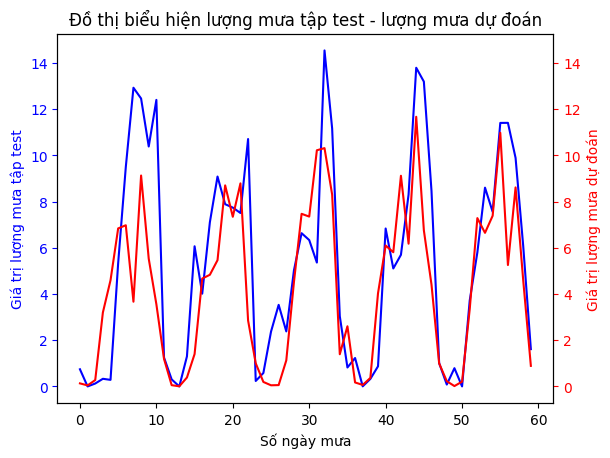

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số ngày mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()


# Tunning Hyperparameter for LightGBM

In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': 'true',
    'boosting_type':'dart'
}
model_LightGBM = lgb.LGBMRegressor(**params)

In [ ]:
n_estimators = [50, 100, 150, 200, 250, 300]
#max_depth = [2, 4, 6, 8]
#learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
alpha = [0, 0.1, 0.5, 1]  # L1 regularization (0 for no regularization)
lambda_val = [0, 0.1, 0.5, 1]  # L2 regularization (0 for no regularization)
param_grid = {
    'n_estimators': n_estimators,
    'reg_alpha': alpha,
    'reg_lambda': lambda_val
}

kfold = KFold(n_splits=10, shuffle=False)
grid_search = GridSearchCV(
    estimator=model_LightGBM,
    param_grid=param_grid,
    cv=kfold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    error_score='raise'
)
grid_result=grid_search.fit(X_train,y_train)

[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 1.651959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -9.075679 using {'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.5}


In [ ]:
params = {
    'objective': 'tweedie',
    'metric': 'mean_squared_error',
    'force_row_wise': True,
    'boosting_type': 'dart',
    'n_estimators': 200,
    'reg_alpha': 1,
    'reg_lambda': 0.5
}

model_train_lightgbm = lgb.LGBMRegressor(**params)

# Fit the model with early stopping
model_train_lightgbm.fit(
    X_train,
    y_train
)

[LightGBM] [Info] Total Bins 1206
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 10
[LightGBM] [Info] Start training from score 1.651959
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor(boosting_type='dart', force_row_wise=True,
              metric='mean_squared_error', n_estimators=200,
              objective='tweedie', reg_alpha=1, reg_lambda=0.5)

In [ ]:
#đánh giá trên tập train
y_pred_train_lightgbm = model_train_lightgbm.predict(X_train)
rmse = mean_squared_error(y_train, y_pred_train_lightgbm, squared = False)
mae = mean_absolute_error(y_train, y_pred_train_lightgbm)
print('Root mean squared error train: %f' %(rmse))
print('Mean Abosolute error train: %f' %(mae))
print('NSE train: %f' %(NSE(y_train, y_pred_train_lightgbm)))
#đánh giá trên tập test
y_pred_test_lightgbm = model_train_lightgbm.predict(X_test)
rmse = mean_squared_error(y_test, y_pred_test_lightgbm, squared = False)
mae = mean_absolute_error(y_test, y_pred_test_lightgbm)
print('Root mean squared error test: %f' %(rmse))
print('Mean Abosolute error test: %f' %(mae))
print('NSE test: %f' %(NSE(y_test, y_pred_test_lightgbm)))

Root mean squared error train: 2.020932
Mean Abosolute error train: 1.390094
NSE train: 0.806798
Root mean squared error test: 2.787811
Mean Abosolute error test: 1.957721
NSE test: 0.599207


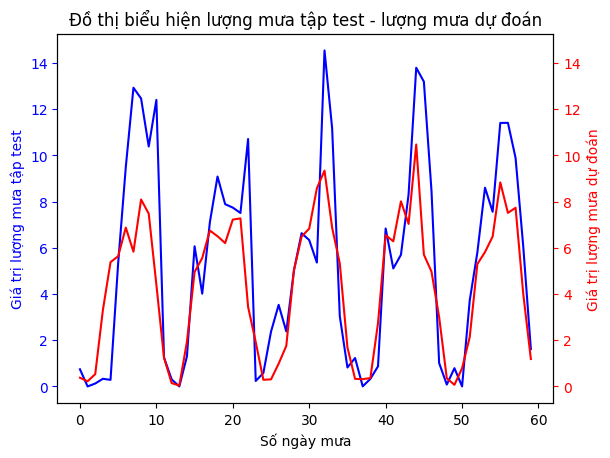

In [ ]:
# Dữ liệu cho trục y thứ nhất
x = range(len(y_test))
y1 = y_test

# Tạo đối tượng Axes thứ nhất
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='blue')
ax1.set_xlabel('Số ngày mưa')
ax1.set_ylabel('Giá trị lượng mưa tập test', color='b')
ax1.tick_params('y', colors='blue')

# Dữ liệu cho trục y thứ hai
y2 = y_pred_test_lightgbm

# Tạo đối tượng Axes thứ hai
ax2 = ax1.twinx()
ax2.plot(x, y2, 'red')
ax2.set_ylabel('Giá trị lượng mưa dự đoán', color='r')
ax2.tick_params('y', colors='red')
# Đặt giới hạn cho trục y2 dựa trên giới hạn của trục y1
y1_min, y1_max = ax1.get_ylim()
ax2.set_ylim(y1_min, y1_max)

# Tiêu đề
plt.title('Đồ thị biểu hiện lượng mưa tập test - lượng mưa dự đoán')

# Hiển thị đồ thị
plt.show()
